In [16]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [17]:
data = pd.read_csv('datasets/KMeans/clara.txt')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


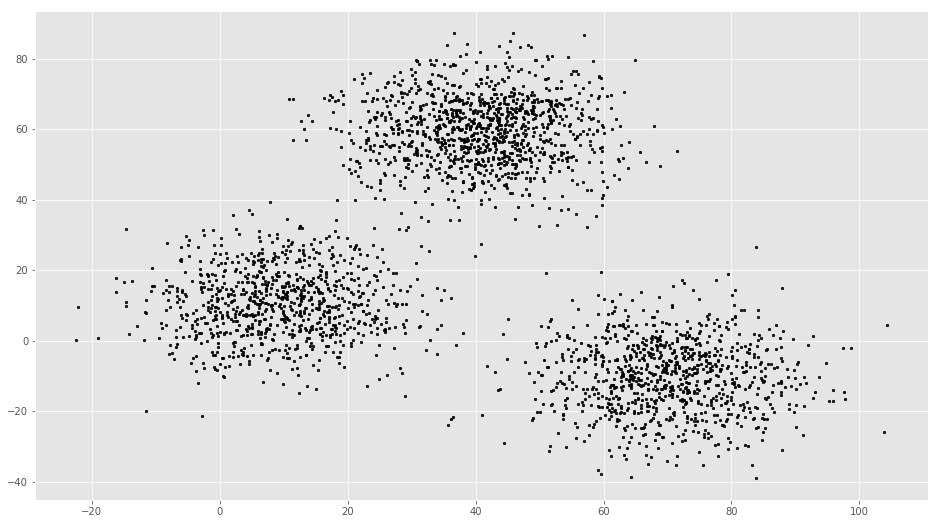

In [18]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [19]:
def EuclideanDistance(a, b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [21]:
k = 3
C_x = np.random.randint(0, np.max(X) - 20, size=k)
C_y = np.random.randint(0, np.max(X) - 20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[40. 50.]
 [49. 63.]
 [22. 82.]]


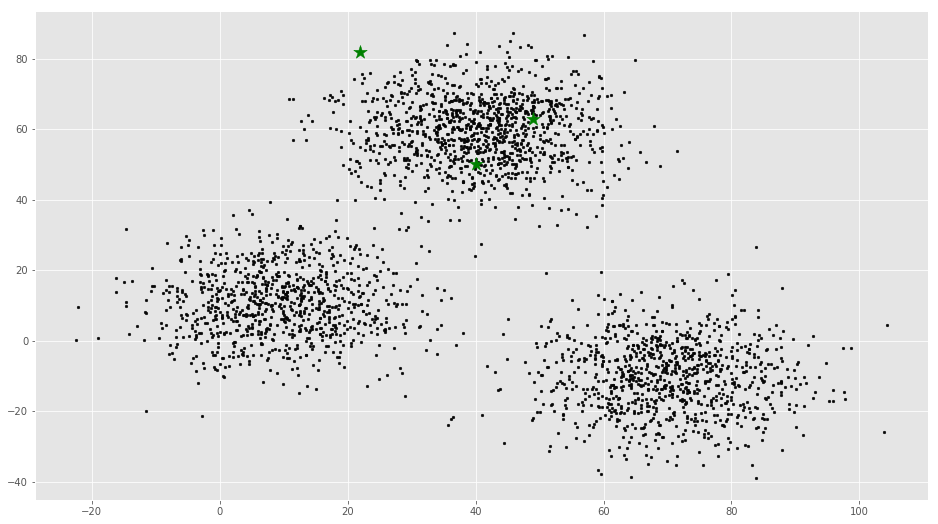

In [22]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [25]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))

error = EuclideanDistance(C, C_old, None)

while error != 0:
    for i in range(len(X)):
        distances = EuclideanDistance(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = deepcopy(C)
    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = EuclideanDistance(C, C_old, None)

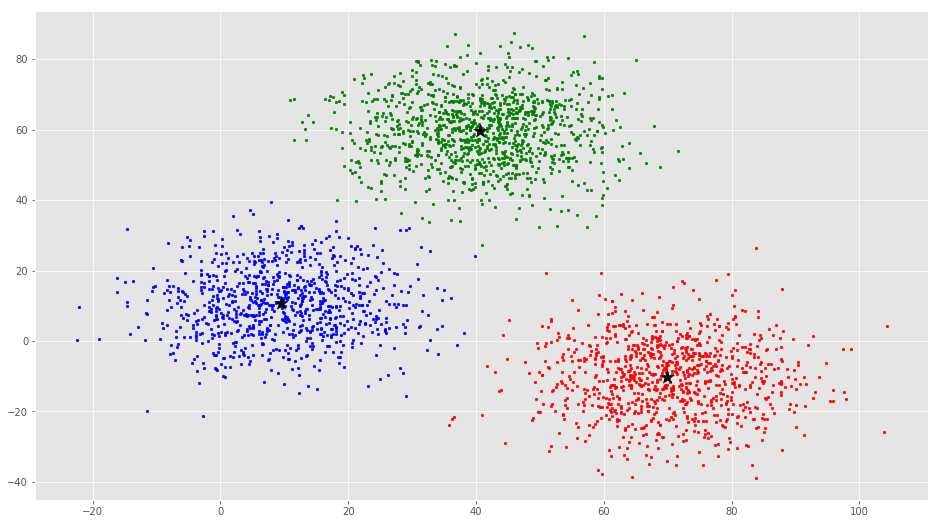

In [26]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [27]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [28]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[ 69.92419  -10.119641]
 [ 40.683628  59.715893]
 [  9.478045  10.686052]]
[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]
